simple technical analysis of S&P 500


In [1]:
import numpy as np
import pandas as pd
import pandas.io.data as web


/Users/anandvishnu/anaconda/lib/python3.5/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [2]:
sp500 = web.DataReader('^GSPC', data_source='yahoo', start='1/1/2000', end='4/14/2014')

In [3]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3592 entries, 2000-01-03 to 2014-04-14
Data columns (total 6 columns):
Open         3592 non-null float64
High         3592 non-null float64
Low          3592 non-null float64
Close        3592 non-null float64
Volume       3592 non-null int64
Adj Close    3592 non-null float64
dtypes: float64(5), int64(1)
memory usage: 196.4 KB


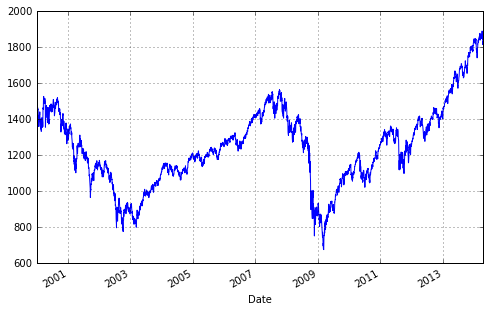

In [5]:
%matplotlib inline
sp500['Adj Close'].plot(grid=True, figsize=(8,5))

In [6]:
sp500['42d'] = np.round(pd.rolling_mean(sp500['Adj Close'], window=42), 2)
sp500['252d'] = np.round(pd.rolling_mean(sp500['Adj Close'], window=252), 2)

/Users/anandvishnu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=42,center=False).mean()
  if __name__ == '__main__':
/Users/anandvishnu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252,center=False).mean()
  from ipykernel import kernelapp as app


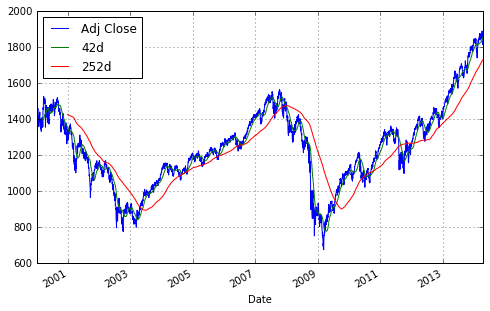

In [7]:
sp500[['Adj Close', '42d', '252d']].plot(grid=True, figsize=(8,5))

**basic trading strategy**

buy = 42d trend is for the first time SD points above the 252d trend

wait = the 42 trend is with a range of +/- SD points around the 252d trend

sell = the 42d trend is for the first time SD points below the 252d trend



In [8]:
signal = 50
sp500['42-252'] = sp500['42d'] - sp500['252d']
sp500['Regime'] = np.where(sp500['42-252'] > signal, 1, 0)
sp500['Regime'] = np.where(sp500['42-252'] < -signal, -1, sp500['Regime'])
sp500['Regime'].value_counts()

 1    1489
 0    1232
-1     871
Name: Regime, dtype: int64

(-1.1, 1.1)

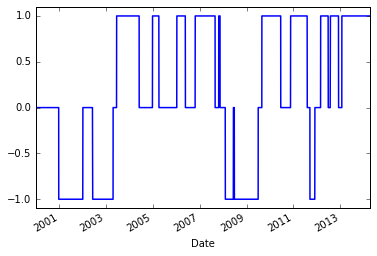

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
sp500['Regime'].plot(lw=1.5)
plt.ylim([-1.1,1.1])